In [1]:
import numpy as np
import math,pickle
import pandas as pd
from scipy.stats import expon
import matplotlib.pyplot as plt

In [2]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

# converting days to hours
TO_HOURS = 24.0

from lib.sir_dyn import *

In [3]:
# Import interactions file
contacts_df = pd.read_csv("cont_miniIsleWight_lin.csv")

In [4]:
#contacts_df.drop_duplicates(keep='first',inplace=True) #add if duplicates of contacts exist

In [5]:
contacts_df

,i,j,t,lambda
0,2,2017,0,0.035812
1,2,2673,0,0.076762
2,2,2682,0,0.019811
3,2,2937,0,0.040393
4,2,3113,0,0.053255
...,...,...,...,...
2978151,14192,3150,19,0.127841
2978152,14192,6685,19,0.027659
2978153,14192,8473,19,0.078974
2978154,14192,10753,19,0.081457


#### SIR dynamics on the contact network obtained from daily contacts

In [6]:
# last time step for the dynamics
Tdyn = 20
# probability of infection
beta = 0.02
# recovery rate
rec_rate = 0.001
prob_rec = [expon.cdf(x, scale=1./rec_rate) for x in range(Tdyn)]

The probability of infection of individual i in a day is given by 

\begin{equation}
1- \prod_j \left(1- \lambda_{ji}(day)\right)= 1- \prod_j \left(1- 1 + e^{- \beta \Delta t_{ij}(day)}\right) = 1- e^{\beta \sum_j \Delta t_{ij}(day)}
\end{equation}



In [7]:
contacts=list(contacts_df.to_records(index=False))

#print stuff
tot_contacts = len(contacts)
N = contacts_df.loc[:,"i":"j"].max().max() + 1
print(f"number of individuals: {N}")
print(f"number of unique contacts: {tot_contacts}")

N_patient_zero = 1
seeds_idx = random.sample(range(N), N_patient_zero)
print("Number of seeds:", N_patient_zero)

number of individuals: 14194
number of unique contacts: 2978156
Number of seeds: 1


In [8]:
#contacts_df

t: 0 (S,I,R) 14193 1 0
t: 10 (S,I,R) 12908 1256 30


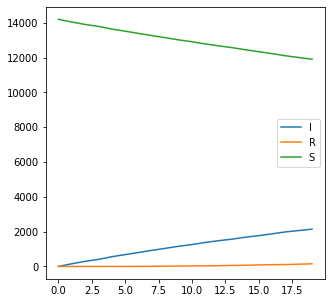

In [9]:
nprint = 10
n_sus, n_inf, n_rec, states, tinf = run_sir(seeds_idx, Tdyn, beta, prob_rec, nprint, contacts_df, N)


plt.rcParams['figure.figsize'] = [5, 5]

plt.plot(n_inf, label = 'I')
plt.plot(n_rec, label = 'R')
plt.plot(n_sus, label = 'S')

plt.legend();

#### Save configurations

In [13]:
states_df=pd.DataFrame(states)
states_df.to_csv('confs_sir_IsleWight.csv')    

In [14]:
states_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Distribution of transmission coefficient values over the edges

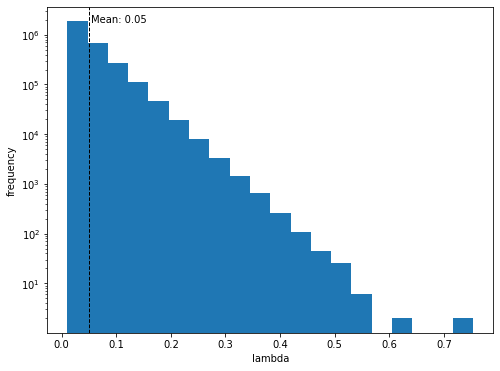

In [15]:
lamb=np.array([contacts[i][3] for i in range(len(contacts))])
plt.figure(figsize=(8,6))
plt.hist(lamb,bins=20)
plt.axvline(lamb.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(lamb.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(lamb.mean()))
plt.yscale('log')
plt.xlabel('lambda')
plt.ylabel('frequency')
plt.show()